<a href="https://colab.research.google.com/github/shazhao57/Retrieve-Emails-Llama-index/blob/main/Done_cluster_emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pip Installation

In [ ]:
!pip install llama-index

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.1/645.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 1.8 MB/s eta 0:00:00


In [ ]:
!pip install google-cloud-secret-manager

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 2.2 MB/s eta 0:00:00


In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.5 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=759364a654d2176de471ba7cfd9d802d3936d10d87c76025a464bf7c66dcac18
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
!pip install InstructorEmbedding

# Import

In [ ]:
from llama_index import StorageContext,ServiceContext,VectorStoreIndex,load_index_from_storage
from llama_index import LangchainEmbedding, LLMPredictor, ServiceContext, set_global_service_context
from llama_index.node_parser import SimpleNodeParser
from langchain.chat_models import ChatOpenAI
from langchain.text_splitter import RecursiveCharacterTextSplitter
from llama_index.langchain_helpers.text_splitter import SentenceSplitter
from langchain.embeddings import HuggingFaceInstructEmbeddings

# Set OpenAI

In [ ]:
from google.colab import auth
from google.colab import drive

auth.authenticate_user()

In [ ]:
import openai
import os
import json
from google.cloud import secretmanager

# Set up the Secret Manager client
client1 = secretmanager.SecretManagerServiceClient()
name1 = "projects/339902708114/secrets/openai_api_key/versions/latest"
response1 = client1.access_secret_version(request={"name": name1})

# Retrieve the API key from the secret
api_key1 = response1.payload.data.decode("UTF-8")

# Set the OpenAI API key
openai.api_key = api_key1
os.environ["OPENAI_API_KEY"]=api_key1


In [ ]:
from langchain.llms import OpenAI

llm = OpenAI()

# Change ada into instructor

In [ ]:
# change ada into instructor
#from langchain.embeddings import HuggingFaceInstructEmbeddings
#from llama_index import LangchainEmbedding

#config model
model_name = "hkunlp/instructor-xl"
encode_kwargs = {'normalize_embeddings': True,
                 "show_progress_bar":True}

# Link to info: https://huggingface.co/hkunlp/instructor-xl (actual implementation is a little complicated which is why we use langchain wrapper)
# Make langchain embed model object

hf = HuggingFaceInstructEmbeddings(
    model_name=model_name,
    encode_kwargs=encode_kwargs
)

#Make model that works for llama_index
embed_model=LangchainEmbedding(hf)

service_context=ServiceContext.from_defaults(embed_model=embed_model)

'''
#Specify other preferences for llama_index functionalities
llm= ChatOpenAI(model_name="gpt-3.5-turbo")
llm_pred=LLMPredictor(llm)


#Set it global so it will be applied to all relevant llama index functions
set_global_service_context(service_context)
'''


/usr/local/lib/python3.10/dist-packages/InstructorEmbedding/instructor.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange


load INSTRUCTOR_Transformer
max_seq_length  512


'\n#Specify other preferences for llama_index functionalities\nllm= ChatOpenAI(model_name="gpt-3.5-turbo")\nllm_pred=LLMPredictor(llm)\n\n\n#Set it global so it will be applied to all relevant llama index functions\nset_global_service_context(service_context)\n'

# GmailReader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.cloud import secretmanager_v1 as secretmanager
from google.auth import default as google_auth

import googleapiclient.discovery
import googleapiclient.errors

In [ ]:
"""Google Mail reader."""
import email
from typing import Any, List
from llama_index.readers.base import BaseReader
from llama_index.readers.schema.base import Document
from pydantic import BaseModel
import base64
from datetime import datetime
import pytz
import re
from dateutil.parser import parse


SCOPES = ["https://www.googleapis.com/auth/gmail.readonly"]


class GmailReader(BaseReader, BaseModel):
    '''
    GmailReader class is used to fetch and read emails from a Gmail account.
    '''
    query: str = None
    use_iterative_parser: bool = False
    service: Any
    def load_data(self) -> List[Document]:
        """
        Load emails from the user's account, and return them as a list of Document objects.

        Returns:
            List[Document]: List of Document objects representing each email.
        """
        # Importing the necessary libraries
        from googleapiclient.discovery import build
        import json
        from google.oauth2.credentials import Credentials

        # Get the Gmail API credentials
        credentials = self._get_credentials()

        # Credentials are returned as a JSON string, so load this into a dictionary
        credentials_dict = json.loads(credentials)

        # Convert the dictionary into a Google API credentials object
        credentials1 = Credentials.from_authorized_user_info(credentials_dict)

        # Build the Gmail service if it doesn't exist
        if not self.service:
            self.service = build('gmail', 'v1', credentials=credentials1)

        # Search for email messages
        messages = self.search_messages()

        # Process each message into a Document and append it to the results list
        results = []
        for message in messages:
            text = message.pop('body')
            extra_info = message
            results.append(Document(text=text, metadata=extra_info))

        return results

    def _get_credentials(self) -> Any:
        """
        Retrieve Gmail API credentials from Google Cloud Secret Manager.

        Returns:
            str: Credential data in string format.
        """
        # Specify the secret name and project ID
        secret_name = 'tanaka-office-gmail-credencial'
        project_id = 'vivid-kite-315522'

        # Create the Secret Manager client
        client = secretmanager.SecretManagerServiceClient()
        # Build the secret name path
        secret_path = f"projects/{project_id}/secrets/{secret_name}/versions/latest"

        # Access the secret version
        response = client.access_secret_version(request={"name": secret_path})

        # Retrieve the secret value, decoding it from bytes to a UTF-8 string
        secret_value = response.payload.data.decode("UTF-8")

        return secret_value

    def search_messages(self):
        """
        Search for and retrieve message data for all emails in the user's account matching a given query.

        Returns:
            list: A list of dictionaries representing each email message's data.
        """
        # Assign the query
        query = self.query

        # Use the Gmail API to list all messages matching the query
        messages = self.service.users().messages().list(
            userId='me',
            q=query,
        ).execute().get('messages', [])

        result = []
        for message in messages:
            try:
                # Retrieve and process the message data
                message_data = self.get_message_data(message)
                # Skip the message if no data was found
                if not message_data:
                    continue
                # Add the processed message data to the results list
                result.append(message_data)
            except AttributeError as ae:
                print(f"AttributeError: {ae}")
                print(f"Problematic message: {message}")
            except Exception as e:
                print(f"Unhandled exception: {e}")

        return result


    def get_message_data(self, message):
        """
        Retrieve and process the data for a given message.

        Args:
            message (dict): The message to process.

        Returns:
            dict: A dictionary containing the message's body and headers, or None if the message has no body.
        """
        # Assign the message ID
        message_id = message['id']
        # Retrieve the raw message data
        message_data = self.service.users().messages().get(
            format="raw",
            userId='me',
            id=message_id).execute()

        # Convert the raw message data into a MIME message

        body_bytes = base64.urlsafe_b64decode(message_data['raw'].encode('ASCII'))
        mime_msg = email.message_from_bytes(body_bytes)

        # Extract the message body
        body = self.extract_message_body(mime_msg)

        # Return None if the message has no body
        if not body:
            return None

        # Extract the message headers
        headers = dict(mime_msg.items())

        # Decode the Subject header
        from email.header import decode_header

        decoded_header = decode_header(headers.get('Subject'))
        decoded_subject = ''
        for text, charset in decoded_header:
            if isinstance(text, bytes):
                decoded_subject += text.decode(charset if charset else 'utf-8')
            else:
                decoded_subject += text
        headers['Subject'] = decoded_subject


        # Convert the Date header to a different time zone
        email_date_str = headers.get('Date')
        if email_date_str:
            email_date = parse(email_date_str)
            email_date = email_date.astimezone(pytz.timezone('Etc/GMT+7'))
            headers['Date'] = email_date.strftime("%a, %d %b %Y %H:%M:%S %z")
        else:
            headers['Date'] = 'Unknown'


        # Return the message data
        return {
            "body": body,
            "Subject": headers.get('Subject'),
            "From": headers.get('From'),
            "To": headers.get('To'),
            "Date": headers.get('Date'),
        }
    def extract_message_body(self, mime_msg):
        """
        Extract the body of an email message from a MIME message object.

        This function handles both single part ('text/plain') and multipart MIME messages. If the MIME message
        is multipart, this function goes through each part and if the part is of type 'text/plain', it decodes
        it according to its charset. If no charset is provided, the part's payload is directly used.

        For a 'text/plain' MIME message, the message is decoded based on its charset, and if no charset is
        provided, the payload is used directly.

        Args:
            mime_msg (email.message.Message): The MIME message object from which to extract the email body.

        Returns:
            str: The body of the email message, potentially concatenated from multiple parts.
        """
        body_text = ''

        # If the email message is of multipart type
        if mime_msg.is_multipart():
            # Loop through each part in the email message
            for part in mime_msg.get_payload():
                # If the part is of type 'text/plain'
                if part.get_content_type() == 'text/plain':
                    charset = part.get_content_charset()
                    # If charset is provided, decode the payload accordingly
                    if charset is not None:
                        body_text += part.get_payload(decode=True).decode(str(charset), errors="replace")
                    else:
                        # If no charset, use the payload directly
                        body_text += part.get_payload()
        # If the email message is not of multipart type but 'text/plain'
        elif mime_msg.get_content_type() == 'text/plain':
            charset = mime_msg.get_content_charset()
            # If charset is provided, decode the payload accordingly
            if charset is not None:
                body_text = mime_msg.get_payload(decode=True).decode(str(charset), errors="replace")
            else:
                # If no charset, use the payload directly
                body_text = mime_msg.get_payload()

        # Return the body text
        return body_text

    def get_addresses(self, start_date, end_date):
            self.load_data()

            exclude_emails = ['business@ms.email.nextdoor.com','reply@rs.email.nextdoor.com','support@volunteermatch.org', 'handshake@mail.joinhandshake.com',"noreply@volunteermatch.org","calendar-notification@google.com","councilmember.tanaka.office@gregtanaka.org","Councilmember.Tanaka.Office@gregtanaka.org","noreply@hubspot.com","no-reply@rs.email.nextdoor.com"]

            query = f"after:{start_date} before:{end_date}"

            addresses = set()
            page_token = None
            while True:
                if page_token:
                    results = self.service.users().messages().list(userId='me', q=query, pageToken=page_token).execute()
                else:
                    results = self.service.users().messages().list(userId='me',q=query).execute()
                messages = results.get('messages', [])

                for msg in messages:
                    msg_data = self.service.users().messages().get(userId='me', id=msg['id']).execute()

                    # extract the From field
                    headers = msg_data['payload']['headers']
                    for header in headers:
                        name = header['name']
                        if name.lower() == 'from':
                            # Use regex to find all email addresses in the header value
                            #email_list = re.findall(r'[\w\.-]+@[\w\.-]+', header['value'])
                            email_list = re.findall(r'[\w.+-]+@[\w\.-]+', header['value'])


                            for email in email_list:
                                if email not in exclude_emails:
                                    addresses.add(email)

                page_token = results.get('nextPageToken')
                if not page_token:
                    break

            return list(addresses)


    def get_addresses_keyword(self, keyword, start_date=None, end_date=None):
        self.load_data()

        exclude_emails = ['support@volunteermatch.org', 'handshake@mail.joinhandshake.com',"noreply@volunteermatch.org","calendar-notification@google.com","councilmember.tanaka.office@gregtanaka.org","Councilmember.Tanaka.Office@gregtanaka.org","noreply@hubspot.com","no-reply@rs.email.nextdoor.com"]

        # If start_date and end_date are provided, add them to the query
        if start_date and end_date:
            query = f"{keyword} after:{start_date} before:{end_date}"
        else:
            query = f"{keyword}"

        results = self.service.users().messages().list(userId='me',q=query).execute()
        messages = results.get('messages', [])

        addresses = set()
        for msg in messages:
            msg_data = self.service.users().messages().get(userId='me', id=msg['id']).execute()

            # extract the From field
            headers = msg_data['payload']['headers']
            for header in headers:
                name = header['name']
                if name.lower() == 'from':
                    # Use regex to find all email addresses in the header value
                    #email_list = re.findall(r'[\w\.-]+@[\w\.-]+', header['value'])
                    email_list = re.findall(r'[\w.+-]+@[\w\.-]+', header['value'])

                    for email in email_list:
                        if email not in exclude_emails:
                            addresses.add(email)

        return list(addresses)


# Retrieve relevant emails based on certain topic

In [ ]:
import os
import pickle
from datetime import datetime
import numpy
import json
import time
from sklearn.cluster import KMeans
from llama_index import VectorStoreIndex
from llama_index import indices
from sklearn.feature_extraction.text import TfidfVectorizer
import pprint
import textwrap
import pandas as pd
from datetime import timedelta


def retrieve_email(start_date, end_date):
    """
    Retrieves emails from Gmail between the specified start and end dates, and
    builds or updates an index to store the retrieved documents.

    Args:
        start_date (str): The start date in the format 'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'. This date is included in the range.

    Returns:
        all_index (VectorStoreIndex): An index object containing the retrieved documents.
        ids_in_range (list): A list of document IDs corresponding to the emails in the desired date range.


    Steps:
        1. Paths to index and day_tracker files are defined.
        2. Input start_date and end_date are converted to datetime objects.
        3. The day_tracker (a set of processed dates) is loaded or initialized.
        4. The email index is loaded from disk or initialized if it doesn't exist.
        5. A date range is created, and emails are fetched for dates not present in day_tracker.
        6. A GmailReader object is used to get email addresses and retrieve documents for the specified date range.
        7. Documents are added to the all_index object.
        8. The day_tracker set is updated with the processed date.
        9. If new documents were added, the updated index and day_tracker are saved to disk.
        10, Got ids_in_range, a list of document IDs corresponding to the emails in the desired date range.
    """

    index_file_path = "/content/drive/Shareddrives/Internal Documents/Cluster_Analysis_of_Emails/All_Index"
    day_tracker_file_path = "/content/drive/Shareddrives/Internal Documents/Cluster_Analysis_of_Emails/All_Index/day_tracker.pickle"

    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')

    # Load or initialize day tracker
    if os.path.exists(day_tracker_file_path):
        with open(day_tracker_file_path, 'rb') as f:
            day_tracker = pickle.load(f)
    else:
        day_tracker = set()

        # Initialize a new index or load from existing
    if os.path.exists(index_file_path) and os.listdir(index_file_path):
        # Load the storage context
        storage_context = StorageContext.from_defaults(persist_dir=index_file_path)
        # Load the index from storage
        all_index = load_index_from_storage(storage_context)
    else:
        all_index = VectorStoreIndex.from_documents(documents=[])# Initialize if index does not exist

        # persist the empty index to initialize the files
        all_index.storage_context.persist(index_file_path)

    date_range = pd.date_range(start=start_date, end=end_date)

    # Add a flag to track if the loop was executed
    loop_executed = False

    for date in date_range:

        if date not in day_tracker:
            reader_address = GmailReader()

            start_date_str = date.strftime('%Y-%m-%d')
            end_date = date + timedelta(days=1)  # add one day to the start date
            end_date_str = end_date.strftime('%Y-%m-%d')

            email_addresses = reader_address.get_addresses(start_date_str, end_date_str)

            all_documents = []
            for address in email_addresses:
                reader = GmailReader(query=f"from:{address} after:{start_date_str} before:{end_date_str}")
                #reader = GmailReader(query=f"from:{'dc@zombierunner.com'} after:{start_date_str} before:{end_date_str}")

                documents = reader.load_data()
                all_documents.extend(documents)
            # Add new documents to the existing index
            for document in all_documents:
                all_index.insert(document)

            # Update the day tracker
            day_tracker.add(date)
            loop_executed = True # Set the flag to true inside the loop

    if loop_executed:
        # Save the index to the file only if the loop was executed
        all_index.storage_context.persist(index_file_path)

    # Save the day tracker to its file
    with open(day_tracker_file_path, 'wb') as f:
        pickle.dump(day_tracker, f)

    # got the id_s within the data range
    all_nodes = all_index.docstore.docs.values()
    ids_in_range = [node.id_ for node in all_nodes if start_date < datetime.strptime(node.metadata.get("Date"), '%a, %d %b %Y %H:%M:%S %z').replace(tzinfo=None) < end_date]

    return all_index,ids_in_range



In [ ]:
from llama_index.indices.vector_store.retrievers import VectorIndexRetriever
def relevant_emails(topic,threshold,all_index,ids_in_range,similarity_top_k):
    """
    Retrieves relevant emails based on a given topic and other specified parameters.

    Args:
        topic (str): The topic to search for within the emails.
        threshold (float): The minimum similarity score required for an email to be considered relevant.
        all_index (VectorStoreIndex): The VectorStoreIndex object containing the entire email index.
        ids_in_range (list): A list of document IDs corresponding to the emails in the desired date range.
        similarity_top_k (int): The number of top similar results to consider.

    Returns:
        X_data (numpy.array): An array representing the embeddings of the relevant emails.
        results (list): A list of retrieval results containing relevant email nodes.
        emails_info (list): A list of string summaries of the relevant emails, including subject, date, sender, body, and score.
        index (VectorStoreIndex): A VectorStoreIndex object containing only the relevant documents.

    Example:
        topic = "Fiber Activities"
        threshold = 0.778
        similarity_top_k = 30
        all_index, ids_in_range = retrieve_email(start_date, end_date)
        X_data, results, emails_info, index = relevant_emails(topic, threshold, all_index, ids_in_range, similarity_top_k)
    """

    file_path = "/content/drive/Shareddrives/Internal Documents/Cluster_Analysis_of_Emails/Relevant_Index"

    filtered_retriever=VectorIndexRetriever(index=all_index,node_ids=ids_in_range,similarity_top_k=similarity_top_k)

    results = filtered_retriever.retrieve(topic)
    emails_info=[]
    relevant_documents = []

    # Iterate over the retrieved results
    for result in results:
        if result.score >= threshold:
            relevant_documents.append(result.node)
            email_info = "Subject: {}\nDate: {}\nFrom: {}\nBody:\n{}\nScore: {}".format(result.node.metadata['Subject'],
                                                              result.node.metadata['Date'],result.node.metadata['From'],
                                                              '\n'.join(textwrap.wrap(result.node.text, width=80)),
                                                                          result.score)
            emails_info.append(email_info)

    # Vector database for relevant documents
    index = VectorStoreIndex(relevant_documents)

    # Persist the index storage context to the file path
    index.storage_context.persist(file_path)

    # Extract the embeddings from the JSON data
    vector_emails = []

    for embedding in index.storage_context.to_dict()["vector_store"]["embedding_dict"].values():
        vector_emails.append(embedding)

    # Convert to matrix form
    X_data = numpy.array(vector_emails)

    return X_data,results,emails_info,index


# Cluster-Kmeans

In [ ]:
def find_cluster_centers(cluster_size,min_cluster_size,X_data):
    """
    Applies KMeans clustering to previously defined data (X_data) and retrieves the cluster centers,
    filtering them based on a minimum cluster size.

    Args:
        cluster_size (int): The desired number of clusters to form.
        min_cluster_size (int): The minimum number of data points that a cluster must contain to be considered valid.
        X_data: fit the model
    Returns:
        model (KMeans): The fitted KMeans model.
        cluster_centers (numpy.array): An array of cluster centers for all clusters.
        num_valid_clusters (int): The number of clusters that meet the minimum cluster size requirement.
        email_labels (numpy.array): An array of cluster labels for each data point in X_data.
    """
    # Apply KMeans clustering
    model = KMeans(n_clusters=cluster_size, init='k-means++', max_iter=100, n_init=10)
    model.fit(X_data)

    # Get the cluster centers and the number of data points in each cluster
    cluster_centers = model.cluster_centers_
    email_labels = model.labels_
    cluster_counts = {i: len(X_data[model.labels_ == i]) for i in range(cluster_size)}

    # Filter out clusters that don't meet the minimum cluster size requirement
    valid_clusters = [i for i in range(cluster_size) if cluster_counts[i] >= min_cluster_size]
    filtered_cluster_centers = cluster_centers[valid_clusters]

    # Get the number of clusters that meet the minimum cluster size requirement
    num_valid_clusters = len(valid_clusters)

    return model,model.cluster_centers_,num_valid_clusters,email_labels


In [ ]:
def clusters_lists(emails_info, email_labels, cluster_size, min_cluster_size):
    # Initialize an empty list for each cluster
    cluster_emails = [[] for _ in range(cluster_size)]

    # Append email info to the corresponding cluster list
    for email_info, label in zip(emails_info, email_labels):
        cluster_emails[label].append(email_info)

    # Calculate the number of clusters with at least min_cluster_size data points
    num_valid_clusters = sum(1 for cluster in cluster_emails if len(cluster) >= min_cluster_size)

    # Create a summary of the clusters
    cluster_summary = []
    for i in range(cluster_size):

        summary = f"Cluster {i}: {len(cluster_emails[i])} emails"
        cluster_summary.append((summary, cluster_emails[i]))

    return cluster_summary


# Summerize the cluster

In [ ]:
from operator import indexOf

from llama_index.indices.query.schema import QueryBundle
import pprint

def summarize_cluster(index,cluster_centers):
    responses = []
    query_engine = index.as_query_engine(response_mode="tree_summarize")
    # Iterate over the cluster centers

    for center in cluster_centers:
        # Create a QueryBundle with the cluster center as the custom_embedding_strs
        query_bundle = QueryBundle(query_str="what is the main concern of this cluster",embedding = center)

        # Query the index with the QueryBundle
        response = query_engine.query(query_bundle)
        #response = query_engine.retrieve(query_bundle)

        #pprint.pprint(response.response)
        responses.append(response.response)
    return responses


# Main function-analyze_clusters

In [ ]:
def analyze_clusters(start_date, end_date, topic, similarity_top_k, cluster_size=2, min_cluster_size=5, threshold=0.75):
    all_index,ids_in_range = retrieve_email(start_date, end_date)
    X_data, results, emails_info, index = relevant_emails(topic, threshold, all_index,ids_in_range,similarity_top_k)
    model, cluster_centers, num_valid_clusters, email_labels = find_cluster_centers(cluster_size, min_cluster_size, X_data)
    cluster_summary = clusters_lists(emails_info, email_labels, cluster_size, min_cluster_size)
    responses = summarize_cluster(index,cluster_centers)

    return model,X_data,index,cluster_summary,responses

In [ ]:
# call function
start_date = "2022-12-01"
end_date = "2022-12-31"
topic = "Overview of Palo Alto Fiber and Fiber Backbone Activities and Discussion of the Fiber Expansion Plan"
similarity_top_k = 30
model,X_data,index,cluster_summary,responses = analyze_clusters(start_date,end_date,topic,similarity_top_k)


In [ ]:
for response in responses:
  print(response)


The main concern of this cluster is the potential environmental impact, compatibility with existing networks, and other considerations of the proposed Palo Alto Fiber project.

The main concern of this cluster is that the City of Palo Alto is planning an expensive fiber network project that will not serve the entire community, and that the city staff is ignorant of the existing underground wiring in some neighborhoods.


In [ ]:
for summary in cluster_summary:
    print(summary)

('Cluster 0: 23 emails', ['Subject: Fw: November 2, 20222 UAC Meeting, Agenda Item #VII.6: Fiber Projects\nDate: Sat, 17 Dec 2022 18:50:29 -0700\nFrom: herb <herb_borock@hotmail.com>\nBody:\nCAUTION: This email originated from outside of the organization. Be cautious of\nopening attachments and clicking on links.  ________________________________\nHerb Borock  P. O. Box 632  Palo Alto, CA 94302    December 17, 2022    Palo\nAlto City Council  250 Hamilton Avenue  Palo Alto, CA 94301      DECEMBER 19,\n2022 CITY COUNCIL MEETING, ITEM #21  FIBER-TO-THE-PREMISES      Dear City\nCouncil:    During his State of the City speech in February 2013, then Mayor\nGreg Scharff said, "In 2013, I believe that Palo Alto needs to develop and\ninitiate a plan to cost-effectively bring Fiber to the Premises (FTTP) ...\noffering at least 1-gigabit Internet connection speeds in both directions."\nNow, nearly ten years later, Utilities Advisory Commissioner Greg Scharff made\nthe motion that was adopted una

In [ ]:
combined_results = []
for response, summary in zip(responses, cluster_summary):
      combined_results.append({
            "response": response,
            "cluster_summary": summary
        })
print(combined_results)

[{'response': '\nThe main concern of this cluster is the potential environmental impact, compatibility with existing networks, and other considerations of the proposed Palo Alto Fiber project.', 'cluster_summary': ('Cluster 0: 23 emails', ['Subject: Fw: November 2, 20222 UAC Meeting, Agenda Item #VII.6: Fiber Projects\nDate: Sat, 17 Dec 2022 18:50:29 -0700\nFrom: herb <herb_borock@hotmail.com>\nBody:\nCAUTION: This email originated from outside of the organization. Be cautious of\nopening attachments and clicking on links.  ________________________________\nHerb Borock  P. O. Box 632  Palo Alto, CA 94302    December 17, 2022    Palo\nAlto City Council  250 Hamilton Avenue  Palo Alto, CA 94301      DECEMBER 19,\n2022 CITY COUNCIL MEETING, ITEM #21  FIBER-TO-THE-PREMISES      Dear City\nCouncil:    During his State of the City speech in February 2013, then Mayor\nGreg Scharff said, "In 2013, I believe that Palo Alto needs to develop and\ninitiate a plan to cost-effectively bring Fiber to

# Visualization

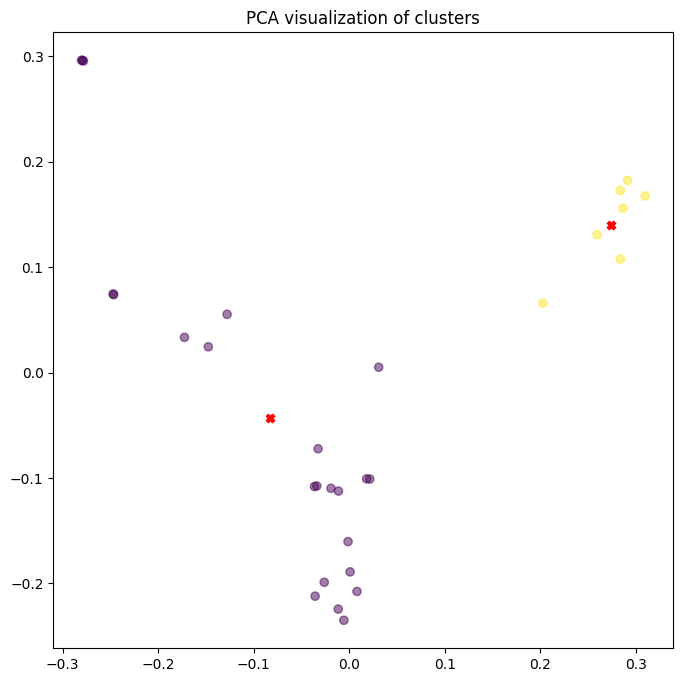

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA on your data and transform it to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_data)

# Get labels of each point
labels = model.predict(X_data)

pca_centroids = pca.transform(model.cluster_centers_)

# PCA visualization including centroids
plt.figure(figsize=(8, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, alpha=0.5)
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], c='red', marker='X')
plt.title('PCA visualization of clusters')
plt.show()

# Day tracker

In [ ]:
# see what day is already in the all_index
# import first
import pickle

day_tracker_file_path = "/content/drive/Shareddrives/Internal Documents/Cluster_Analysis_of_Emails/All_Index/day_tracker.pickle"

# Open the pickle file and load the data
with open(day_tracker_file_path, 'rb') as f:
    day_tracker = pickle.load(f)
# print the date
pprint.pprint(sorted(day_tracker))

[Timestamp('2021-01-01 00:00:00', freq='D'),
 Timestamp('2021-01-02 00:00:00', freq='D'),
 Timestamp('2021-01-03 00:00:00', freq='D'),
 Timestamp('2021-01-04 00:00:00', freq='D'),
 Timestamp('2022-06-01 00:00:00', freq='D'),
 Timestamp('2022-06-02 00:00:00', freq='D'),
 Timestamp('2022-06-03 00:00:00', freq='D'),
 Timestamp('2022-06-04 00:00:00', freq='D'),
 Timestamp('2022-06-05 00:00:00', freq='D'),
 Timestamp('2022-06-06 00:00:00', freq='D'),
 Timestamp('2022-09-10 00:00:00', freq='D'),
 Timestamp('2022-09-11 00:00:00', freq='D'),
 Timestamp('2022-10-01 00:00:00', freq='D'),
 Timestamp('2022-10-02 00:00:00', freq='D'),
 Timestamp('2022-10-03 00:00:00', freq='D'),
 Timestamp('2022-10-04 00:00:00', freq='D'),
 Timestamp('2022-10-05 00:00:00', freq='D'),
 Timestamp('2022-10-06 00:00:00', freq='D'),
 Timestamp('2022-10-07 00:00:00', freq='D'),
 Timestamp('2022-10-08 00:00:00', freq='D'),
 Timestamp('2022-11-01 00:00:00', freq='D'),
 Timestamp('2022-11-02 00:00:00', freq='D'),
 Timestamp